## Implementation of Linear regression using python

In [ ]:
### import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Load the dataset

In [ ]:
df1=pd.read_csv("/content/weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,169.034243,163.852461


### Standardize numerical features

In [ ]:
col=["Height","Weight"]
S1=MinMaxScaler()
df1[col]=S1.fit_transform(df1[col])
df1


,Gender,Height,Weight
0,Male,0.165212,0.863139
1,Male,0.122482,0.475476
2,Male,0.167432,0.721131
3,Male,0.147361,0.756699
4,Male,0.131761,0.689999
...,...,...,...
9995,Female,0.100470,0.351101
9996,Female,0.108016,0.517161
9997,Female,0.081028,0.310660
9998,Female,0.968224,0.482988


## Prepare dependant and independant variables

In [ ]:
X=df1[["Height"]].to_numpy()
Y=df1[["Weight"]].to_numpy()
Y.shape

(10000, 1)

## Split the data into training and test set

In [ ]:
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=67)

In [ ]:
# Create a linear regression model

model=LinearRegression()



Note: Learning more about Linear Regression model here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [ ]:
## Training  Linear regressions model

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
## Calculating the Mean Squared Error (MSE) and R-squared (R2)
Y_pred=model.predict(X_test)

mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)

# Print model coefficients
print(model.coef_[0])
print(model.intercept_)

0.004438047889011704
0.8135299373473699
[3.54709605]
[0.10829265]


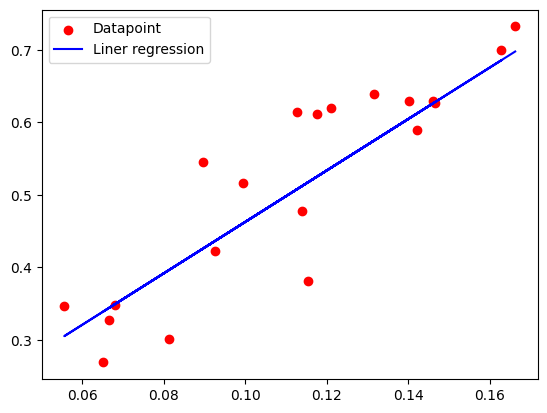

In [ ]:
# Plot the linear regression Model
plt.scatter(X_test[0:20],Y_test[0:20],color="Red",label="Datapoint")
plt.plot(X_test[0:20],Y_pred[0:20],color="Blue",label="Liner regression")
plt.legend()


# Gradient descent Scrath implementations

In [ ]:
## Load the Height and weight  to indipendent and dependent variable

In [ ]:
df2=pd.read_csv("/content/weight-height.csv")
X=df2[["Height"]].to_numpy()
Y=df2["Weight"].values




## 🧠 Z-Score Normalization (Standardization)

The **Z-score** (or **standard score**) measures how many standard deviations a data point is from the mean.

### 📘 Formula

$$
Z = \frac{X - \mu}{\sigma}
$$




In [ ]:
## Standardizes the features X and target variable y using Z-score normalization (also called Standardization).
X=(X-np.mean(X))/np.std(X)
Y=(Y-np.mean(Y))/np.std(Y)


In [ ]:
#add another feature to X corresponding to bias

X=np.hstack((np.ones((X.shape[0],1)),X))
X.shape

(10000, 2)

In [ ]:
# intailize
m=X.shape[0]
learningrate=0.0001
epochs=1000
MSEH=[]
#learnable parameters
theta=np.zeros((X.shape[1],1))

<img src="https://i.postimg.cc/wMYVXD65/1.png" alt="Image Description" width="500">

In [ ]:
# Gradient descent is an optimization algorithm
for i in range(epochs):
  Y_pred=np.dot(X,theta)
  MSE=mean_squared_error(Y.reshape(-1, 1),Y_pred)
  print(MSE)
  MSEH.append(MSE)
  theta=theta-(learningrate/m)*np.dot(X.T,(Y_pred-Y.reshape(-1, 1)))

0.8707320567460499
0.8706152972712337
0.8704985611471445
0.8703818483691129
0.8702651589324698
0.870148492832547
0.8700318500646775
0.8699152306241953
0.869798634506435
0.8696820617067322
0.8695655122204237
0.8694489860428468
0.8693324831693402
0.8692160035952434
0.8690995473158966
0.868983114326641
0.8688667046228191
0.8687503181997738
0.8686339550528491
0.8685176151773903
0.868401298568743
0.8682850052222546
0.8681687351332724
0.8680524882971453
0.8679362647092228
0.8678200643648557
0.8677038872593957
0.8675877333881948
0.8674716027466067
0.8673554953299856
0.8672394111336867
0.8671233501530663
0.8670073123834813
0.86689129782029
0.8667753064588509
0.8666593382945245
0.8665433933226712
0.8664274715386527
0.8663115729378318
0.8661956975155721
0.8660798452672381
0.8659640161881954
0.86584821027381
0.8657324275194497
0.8656166679204822
0.8655009314722769
0.8653852181702039
0.8652695280096343
0.8651538609859397
0.8650382170944934
0.8649225963306689
0.8648069986898408
0.8646914241673851
0

[[-2.58944355e-17]
 [ 1.53079591e-01]]


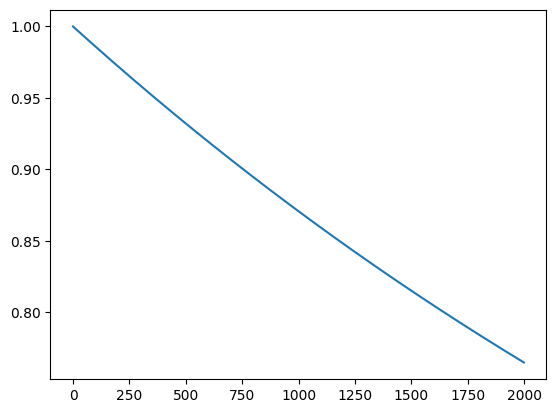

In [ ]:
# Loss graph
plt.plot(MSEH)
print(theta)

## You are required to fit a linear function on Food_delivery_times dataset
Description about the dataset: This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and Preperation time.
1. Feature selection: Consider Food_delivery_time is effected by four features (attributes) given in the dataset, which are Distance_km, Preparation_Time_min, Traffic, Weather
2. Since Traffic, Weather are having categorical values, you need to convert them into numerical using the categorical encoding methods.
3. Now, fit a linear regression model considering Distance_km, Preparation_Time_min, Traffic, and Weather as independant variables and Delivery_Time_min as dependant varibal.


Note: In lab record, you can write the statements relevant to linear regression.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Food_Delivery_Times.csv to Food_Delivery_Times.csv


# Task
Load the "Food_Delivery_Times.csv" dataset, preprocess the categorical features 'Traffic' and 'Weather' using one-hot encoding, and then fit a linear regression model to predict 'Delivery_Time_min' using 'Distance_km', 'Preparation_Time_min', 'Traffic', and 'Weather' as independent variables. Finally, evaluate the model's performance.

## Load the dataset

### Subtask:
Load the "Food_Delivery_Times.csv" file into a pandas DataFrame.


**Reasoning**:
Load the Food_Delivery_Times.csv file into a pandas DataFrame and display the first few rows to verify the loading.



In [ ]:
df_food_delivery = pd.read_csv("/content/Food_Delivery_Times.csv")
display(df_food_delivery.head())

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


## Handle categorical features

### Subtask:
Use one-hot encoding to convert the 'Traffic' and 'Weather' columns into numerical features.


**Reasoning**:
Apply one-hot encoding to the 'Traffic' and 'Weather' columns using `pd.get_dummies` and then concatenate the new columns with the original dataframe while dropping the original categorical columns.



In [ ]:
df_food_delivery = pd.get_dummies(df_food_delivery, columns=['Traffic_Level', 'Weather'], drop_first=True)
display(df_food_delivery.head())

KeyError: "None of [Index(['Traffic_Level', 'Weather'], dtype='object')] are in the [columns]"

**Reasoning**:
The previous attempt failed because the column names 'Traffic' and 'Weather' were not found in the dataframe. I need to check the actual column names in the dataframe before applying one-hot encoding.



In [ ]:
print(df_food_delivery.columns)

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')


**Reasoning**:
The column names are 'Traffic_Level' and 'Weather'. I will now use these correct column names to perform one-hot encoding using `pd.get_dummies` and then display the head of the updated dataframe.



In [ ]:
df_food_delivery = pd.get_dummies(df_food_delivery, columns=['Traffic_Level', 'Weather'], drop_first=True)
display(df_food_delivery.head())

,Order_ID,Distance_km,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Traffic_Level_Low,Traffic_Level_Medium,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
0,522,7.93,Afternoon,Scooter,12,1.0,43,True,False,False,False,False,True
1,738,16.42,Evening,Bike,20,2.0,84,False,True,False,False,False,False
2,741,9.52,Night,Scooter,28,1.0,59,True,False,True,False,False,False
3,661,7.44,Afternoon,Scooter,5,1.0,37,False,True,False,True,False,False
4,412,19.03,Morning,Bike,16,5.0,68,True,False,False,False,False,False


## Define features and target

### Subtask:
Separate the independent variables (Distance_km, Preparation_Time_min, and the encoded Traffic and Weather columns) and the dependent variable (Delivery_Time_min).


**Reasoning**:
Separate the independent variables and the dependent variable according to the instructions.



In [ ]:
features = ['Distance_km', 'Preparation_Time_min'] + [col for col in df_food_delivery.columns if col.startswith('Traffic_Level_') or col.startswith('Weather_')]
X = df_food_delivery[features]
y = df_food_delivery['Delivery_Time_min']
display(X.head())
display(y.head())

,Distance_km,Preparation_Time_min,Traffic_Level_Low,Traffic_Level_Medium,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
0,7.93,12,True,False,False,False,False,True
1,16.42,20,False,True,False,False,False,False
2,9.52,28,True,False,True,False,False,False
3,7.44,5,False,True,False,True,False,False
4,19.03,16,True,False,False,False,False,False


,Delivery_Time_min
0,43
1,84
2,59
3,37
4,68


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 8)
Shape of X_test: (200, 8)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Train the linear regression model

### Subtask:
Fit a linear regression model to the training data.


**Reasoning**:
Fit the linear regression model to the training data.



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Make predictions on the test data and evaluate the model's performance using relevant metrics like Mean Squared Error and R-squared.


**Reasoning**:
Make predictions on the test data and evaluate the model's performance using relevant metrics like Mean Squared Error and R-squared.



In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 92.45559169586788
R-squared: 0.821181900301027


## Summary:

### Data Analysis Key Findings

*   One-hot encoding was successfully applied to the 'Traffic\_Level' and 'Weather' categorical features, converting them into numerical format for the linear regression model.
*   The dataset was split into training and testing sets with an 80/20 ratio, resulting in 800 data points for training and 200 for testing.
*   A linear regression model was trained on the prepared data using 'Distance\_km', 'Preparation\_Time\_min', and the encoded 'Traffic\_Level' and 'Weather' features as predictors for 'Delivery\_Time\_min'.
*   The model's performance on the test set was evaluated, yielding a Mean Squared Error of approximately 92.46 and an R-squared score of approximately 0.821.

### Insights or Next Steps

*   The R-squared value of 0.821 suggests that the chosen features explain a significant portion of the variance in delivery time, indicating a reasonably good model fit.
*   Further analysis could involve examining the coefficients of the linear regression model to understand the specific impact of each feature on delivery time, or exploring alternative regression models to potentially improve performance.
